# a) Isotermer
### Van der Waals tilstandsligning vs ideell gass tilstandsligning

Tilstandsligningen for en ideell gass med trykk $p$, volum $V$, temperatur $T$ og $n$ antall mol er

$$
pV = nRT
$$

der $R$ er gasskonstanten. Van der Waals tilstandsligning er en utvidelse av denne, som tar hensyn for volumet gassmolekylene selv opptar, i tillegg til attraktive krefter mellom molekylene. Den er på formen

$$
\left( p+a\frac{n^2}{V^2}  \right) (V-nb) = nRT
$$

der a-leddet er korreksjonen for molekulær attraksjon, og b-leddet er korreksjonen for volumet av molekylene. Disse konstantene måles vanligvis eksperimentelt.

Parameterene a og b for $N_2$ i van der Waals tilstandsligning er gitt ved: (hentet fra https://web.phys.ntnu.no/~stovneng/TFY4165_2024/oving10/vanderwaalsconstants.pdf)

$$
a = 1.370 \hspace{5px} bar L^2/mol^2
$$

$$
b = 0.0387 \hspace{5px} L/mol
$$

Et pV-diagram med isotermer for $N_2$ og isotermer for en ideell gass viser forskjellene mellom de to tilstandsligningene. For å gjøre dette trenger vi å finne en eksplisitt formel for p som funksjon av V. Snur derfor om på Van der Waals tilstandsligning og får en formel for p:

$$
p = \frac{nRT}{V-nb} - a\frac{n^2}{V^2}
$$


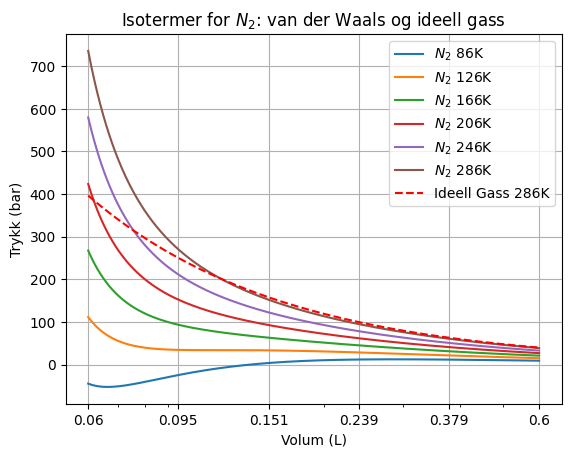

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Konstanter for N2
a = 1.370  # bar L^2/mol^2
b = 0.0387  # L/mol

# Gasskonstanten
R = 0.08314  # L bar/(mol K)


def p_ideell(V: float, T: float, n: int = 1) -> float:
    """
    Beregner trykk ved bruk av ideell gassligning.

    P = nRT/V

    Args:
        V: Volum (L)
        T: Temperatur (K)
        n: Antall mol (default=1)

    Returns:
        Pressure (bar)
    """

    # Ideell gassligning: P = nRT/V
    pressure = (n * R * T) / V

    return pressure


def p_N2(V: float, T: float, n: int = 1) -> float:
    """
    Beregner trykket til N2 ved bruk av van der Waals tilstandsligning.

    P = (nRT)/(V - nb) - (n^2*a)/V^2

    Args:
        V: Volum (L)
        T: Temperatur (K)
        n: Antall mol (default=1)

    Returns:
        Pressure (bar)
    """

    # van der Waals ligning: P = (nRT)/(V - nb) - (n^2*a)/V^2
    pressure = (n * R * T) / (V - n * b) - (n**2 * a) / (V**2)

    return pressure


# Passende min og max verdier for volum
V_min = 0.06  # L
V_max = 0.60  # L

# Verdier for temperatur som gitt i oppgaven
T_min = 86  # K
T_max = 286  # K
T_step = 40  # K

# Setter opp logaritmisk skalerte verdier for V slik at datapunktene blir jevnt fordelt på en logaritmisk akse.
V = np.logspace(np.log10(V_min), np.log10(V_max), 600)

# Beregner trykket for ulike temperaturer, slik at vi får de ulike isotermene
T_values = np.arange(T_min, T_max + 1, T_step)
for T in T_values:
    N2_pressure = p_N2(V, T)
    plt.plot(V, N2_pressure, label=f"$N_2$ {T}K")

# Beregner og plotter isotermen for en ideell gass ved 286K
plt.plot(
    V, p_ideell(V, T_max), label=f"Ideell Gass {T_max}K", linestyle="--", color="red"
)

# Setter x-aksen til en logaritmisk skala for å vise karakteristikken til isotermen.
plt.xscale("log")
x_ticks = np.logspace(np.log10(V_min), np.log10(V_max), 6).round(3)
plt.xticks(x_ticks, labels=x_ticks)


# Plotter
plt.xlabel("Volum (L)")
plt.ylabel("Trykk (bar)")
plt.title("Isotermer for $N_2$: van der Waals og ideell gass")
plt.grid()
plt.legend()
plt.show()

# Joule Thomson koeffisent

Joule thomson koeffisenten beskriver hvordan temperaturen endrer seg ved en isentalpisk trykkendring. Den er gitt som 

$$
\mu_{JT} = \left( \frac {\partial T}{\partial p}   \right)_H  = \frac{V \cdot (T \alpha_V -1)}{C_p}

$$

der $H$ er entalpi, $V$ er volum, $p$ er trykk, $T$ er temperatur, $C_p$ er varmekapasiteten ved konstant trykk og $\alpha_V$ er gitt som

$$
\alpha_V = \frac{1}{V} \left( \frac{\partial V}{\partial T} \right)_p

$$

Hvis vi antar ideell toatomig gass (som $N_2$) er $C_p$ er gitt som:

$$
C_p = nR + C_V = nR + \frac{5}{2}nR =  \frac{7}{2}nR
$$


Setter vi inn disse i formelen for Joule Thomson koeffisienten får vi da det totale uttrykket:

$$
\mu_{JT} =  \frac{2}{7nR}  \left(T \left( \frac{\partial V}{\partial T} \right)_p - V \right)
$$

Siden vi ikke har et analytisk utrykk for T, må vi finne en annen måte å regne ut den partielle deriverte. Dette kan gjøres ved bruk av implisitt derivasjon ved at vi går ut i fra at V er en funksjon av p og T:

$$
f(T, p, V(T, p)) = \frac{nRT}{V(T, p)-nb} - \frac{an^2}{V(T,p)^2} = 0
$$

Så tar vi det totale differensialet:

$$
df = \frac{\partial f}{\partial T}dT + \frac{\partial f}{\partial p}dp + \frac{\partial f}{\partial V(T,p)}dV(T,p) = 0
$$

$dp=0$ ettersom vi ser på konstant trykk:

$$
df = \frac{\partial f}{\partial T}dT + \frac{\partial f}{\partial V(T,p)}dV(T,p) = 0
$$

Deler på $dT$:

$$
\frac{\partial f}{\partial T} + \frac{\partial f}{\partial V(T,p)} \frac{dV(T,p)}{dT} = 0
$$

Ser at $\frac{dV(T,p)}{dT} = \frac{\partial V(T,p)}{\partial T}$ ettersom vi ser på konstant trykk og V kan ses på som en én-variabel funksjon:

$$
\frac{\partial f}{\partial T} + \frac{\partial f}{\partial V(T,p)} \frac{\partial V(T,p)}{\partial T} = 0
$$

Dette gir følgende formel: (Kan også vises lettere med "Triple product rule")

$$
\left( \frac{\partial V}{\partial T} \right)_p = - \frac { \frac{\partial f}{\partial T} } {\frac{\partial f}{\partial V}}

= \frac{ \frac{nR}{V-nb} }{ \frac{nRT}{(V-nb)^2} - \frac{2an^2}{V^3} }
$$

Til slutt må vi finne verdi for V, gitt ved p og T. Vi løser Van der Waals ligningen for V og får følgende tredjegradspolynom, som løses ved hjelp av python.

$$
pV^3 - (pnb+nRT)V^2+an^2V-abn^3 = 0
$$


/tmp/ipykernel_2140224/842376579.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


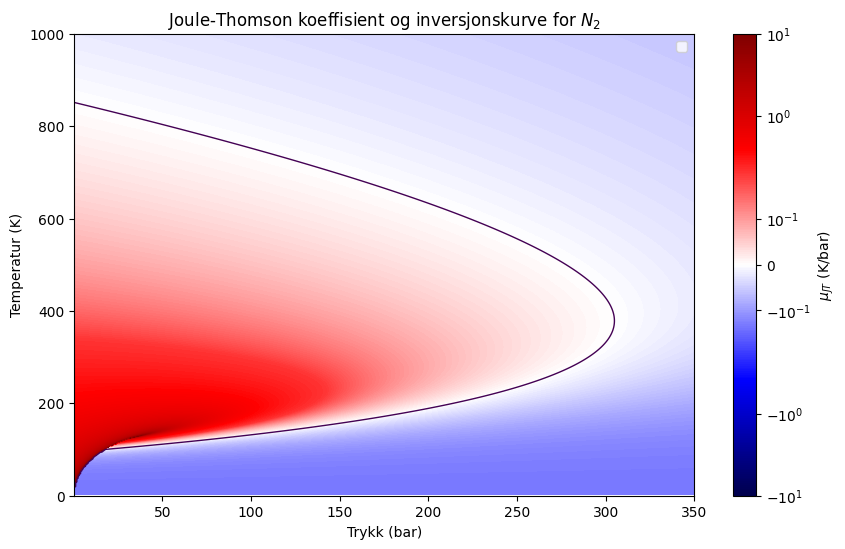

In [106]:
from matplotlib.colors import SymLogNorm


def dV_dT(V: float, T: float, n: int = 1) -> float:
    """
    Beregner partialderivatet ∂V/∂T for N2 ved bruk av van der Waals tilstandsligning.


    Args:
        V: Volum (L)
        T: Temperatur (K)
        n: antall mol (default=1)

    Returns:
        ∂V/∂T (L/K)
    """

    # ∂P/∂T = nR/(V - nb)
    dP_dT = (n * R) / (V - n * b)

    # ∂P/∂V = -nRT/(V - nb)^2 + 2n^2*a/V^3
    dP_dV = -(n * R * T) / (V - n * b) ** 2 + (2 * n**2 * a) / (V**3)

    # ∂V/∂T = -∂P/∂T / ∂P/∂V
    dV_dT = -dP_dT / dP_dV

    return dV_dT


def mu_JT_VT(V: float, T: float, n: int = 1) -> float:
    """
    Beregner Joule-Thomson koeffisienten μ_JT for N2 ved bruk av van der Waals tilstandsligning.

    Args:
        V: Volum (L)
        T: Temperatur (K)
        n: antall mol (default=1)

    Returns:
        μ_JT (K/bar)
    """

    # Beregn ∂V/∂T
    dV_dT_val = dV_dT(V, T, n)

    C_p = 3.5 * R

    mu_JT_val = (T * dV_dT_val - V) / C_p

    return mu_JT_val


def mu_JT_pT(p: float, T: float, n: int = 1) -> float:
    """
    Beregner først volumet fra trykk og temperatur ved å løse et tredjeordens polynom.

    Velger så den største av de reelle røttene, dette vil som oftest tilsvare gasstilstand.

    Så beregner vi Joule-Thomson koeffisienten for denne tilstanden ved bruk av van der Waals tilstandsligning.

    Args:
        p: Trykk (bar)
        T: Temperatur (K)
        n: antall mol (default=1)

    Returns:
        μ_JT (K/bar)
    """

    # Finn V fra p, T og n
    coeffs = [p, -n * (p * b + R * T), a * n**2, -a * b * n**3]

    # Finner røttene til utrykket
    roots = np.roots(coeffs)

    # Sorterer ut reelle røtter
    real_roots = roots.real[np.abs(roots.imag) < 1e-9]

    # Tar kun røtter større enn b, siden V=b er en singularitet og V mindre enn b ikke gir fysisk mening.
    real_roots = real_roots[real_roots > b * 1.0000001]

    if real_roots.size == 0:
        return np.nan

    return mu_JT_VT(np.max(real_roots), T)


# Min og max verdier for temperatur, satt slik at hele inversjonskurven plottes
T_min = 0
T_max = 1000

# Min og max verdier for trykk, satt slik at hele inversjonskurven plottes
P_min = 0.5
P_max = 350

# Setter opp en meshgrid med verdier for temperatur og trykk.
T_vals = np.linspace(T_min, T_max, 500)
p_vals = np.linspace(P_min, P_max, 500)
P_grid, T_grid = np.meshgrid(p_vals, T_vals)

mu_JT_vals = np.zeros_like(P_grid)

# Regner ut Joule Thomson koeffisienten for alle punkter i meshgriden
for i in range(T_vals.size):
    for j in range(p_vals.size):
        mu_JT_vals[i, j] = mu_JT_pT(p_vals[j], T_vals[i])

# Begrenser verdiene, da de kan gå mot uendelig i grenseområdene.
mu_JT_vals[mu_JT_vals > 300] = 300
mu_JT_vals[mu_JT_vals < -300] = -300

# Initialiserer plot.
plt.figure(figsize=(10, 6))

# Lager et heatmap av verdiene for koeffisienten, med en lineær skala i området [-0.2, 0.2] og symmetrisk logaritmisk utenfor.
norm = SymLogNorm(linthresh=0.2, linscale=1.0, vmin=-10, vmax=10)
plt.imshow(
    mu_JT_vals,
    extent=(P_min, P_max, T_min, T_max),
    origin="lower",
    cmap="seismic",
    aspect="auto",
    norm=norm,
)
plt.colorbar(label="$\mu_{JT}$ (K/bar)")

# Legger til en konturlinje der inversjonskurven er, altså der Joule Thomson koeffisienten er 0.
contour = plt.contour(P_grid, T_grid, mu_JT_vals, levels=[0.0], linewidths=1)

# Plotter
plt.xlabel("Trykk (bar)")
plt.ylabel("Temperatur (K)")
plt.title("Joule-Thomson koeffisient og inversjonskurve for $N_2$")
plt.legend()
plt.show()
